<p> Лабороторная работа 5<p>
<p>WIN-1-21</p>
<p>Камбаров Атай</p>

In [8]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_linnerud

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<p>1. Набор данных по диабету</p>

In [9]:
diabetes_dataset = load_diabetes()

<p>Размерность датасета</p>

In [10]:
print(diabetes_dataset['data'].shape)

(442, 10)


In [11]:
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<p>Список признаков</p>

In [12]:
print(diabetes_dataset['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<p>Первые 5 строк датасета</p>

In [13]:
print(diabetes_dataset['data'][:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


<p>Количественная оценка прогрессирования заболевания через год после исходного уровня для каждого из пациентов</p>

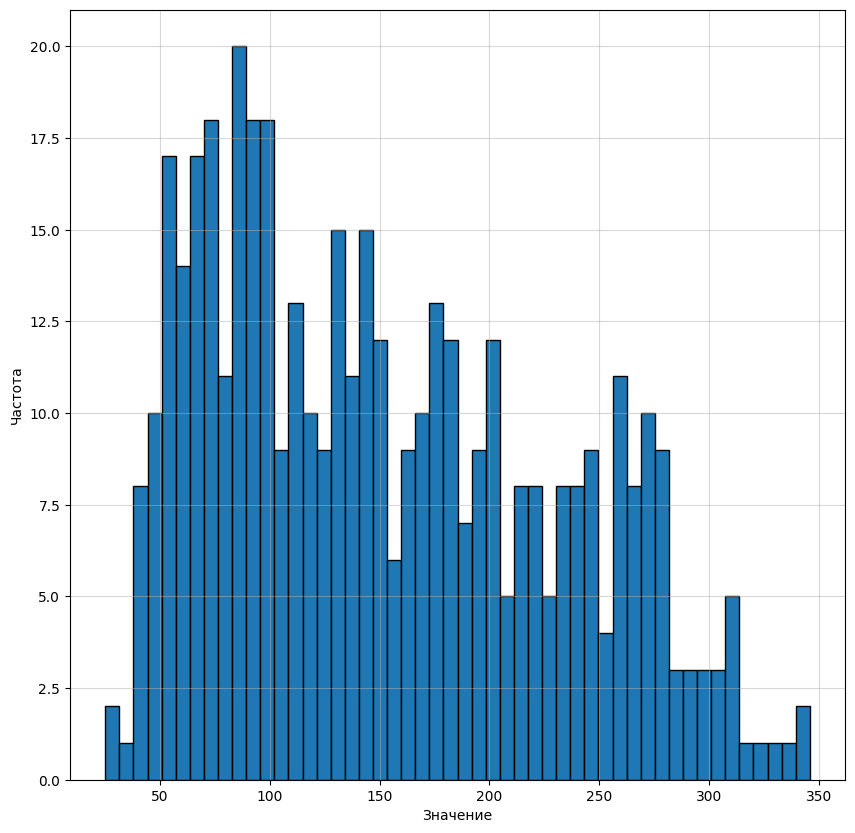

In [17]:
plt.figure(figsize=(10, 10))

plt.hist(diabetes_dataset['target'], bins=50, edgecolor='k')

plt.xlabel('Значение')
plt.ylabel('Частота')

plt.grid(True, alpha=0.5)

plt.show()

<p>Распределение признаков</p>

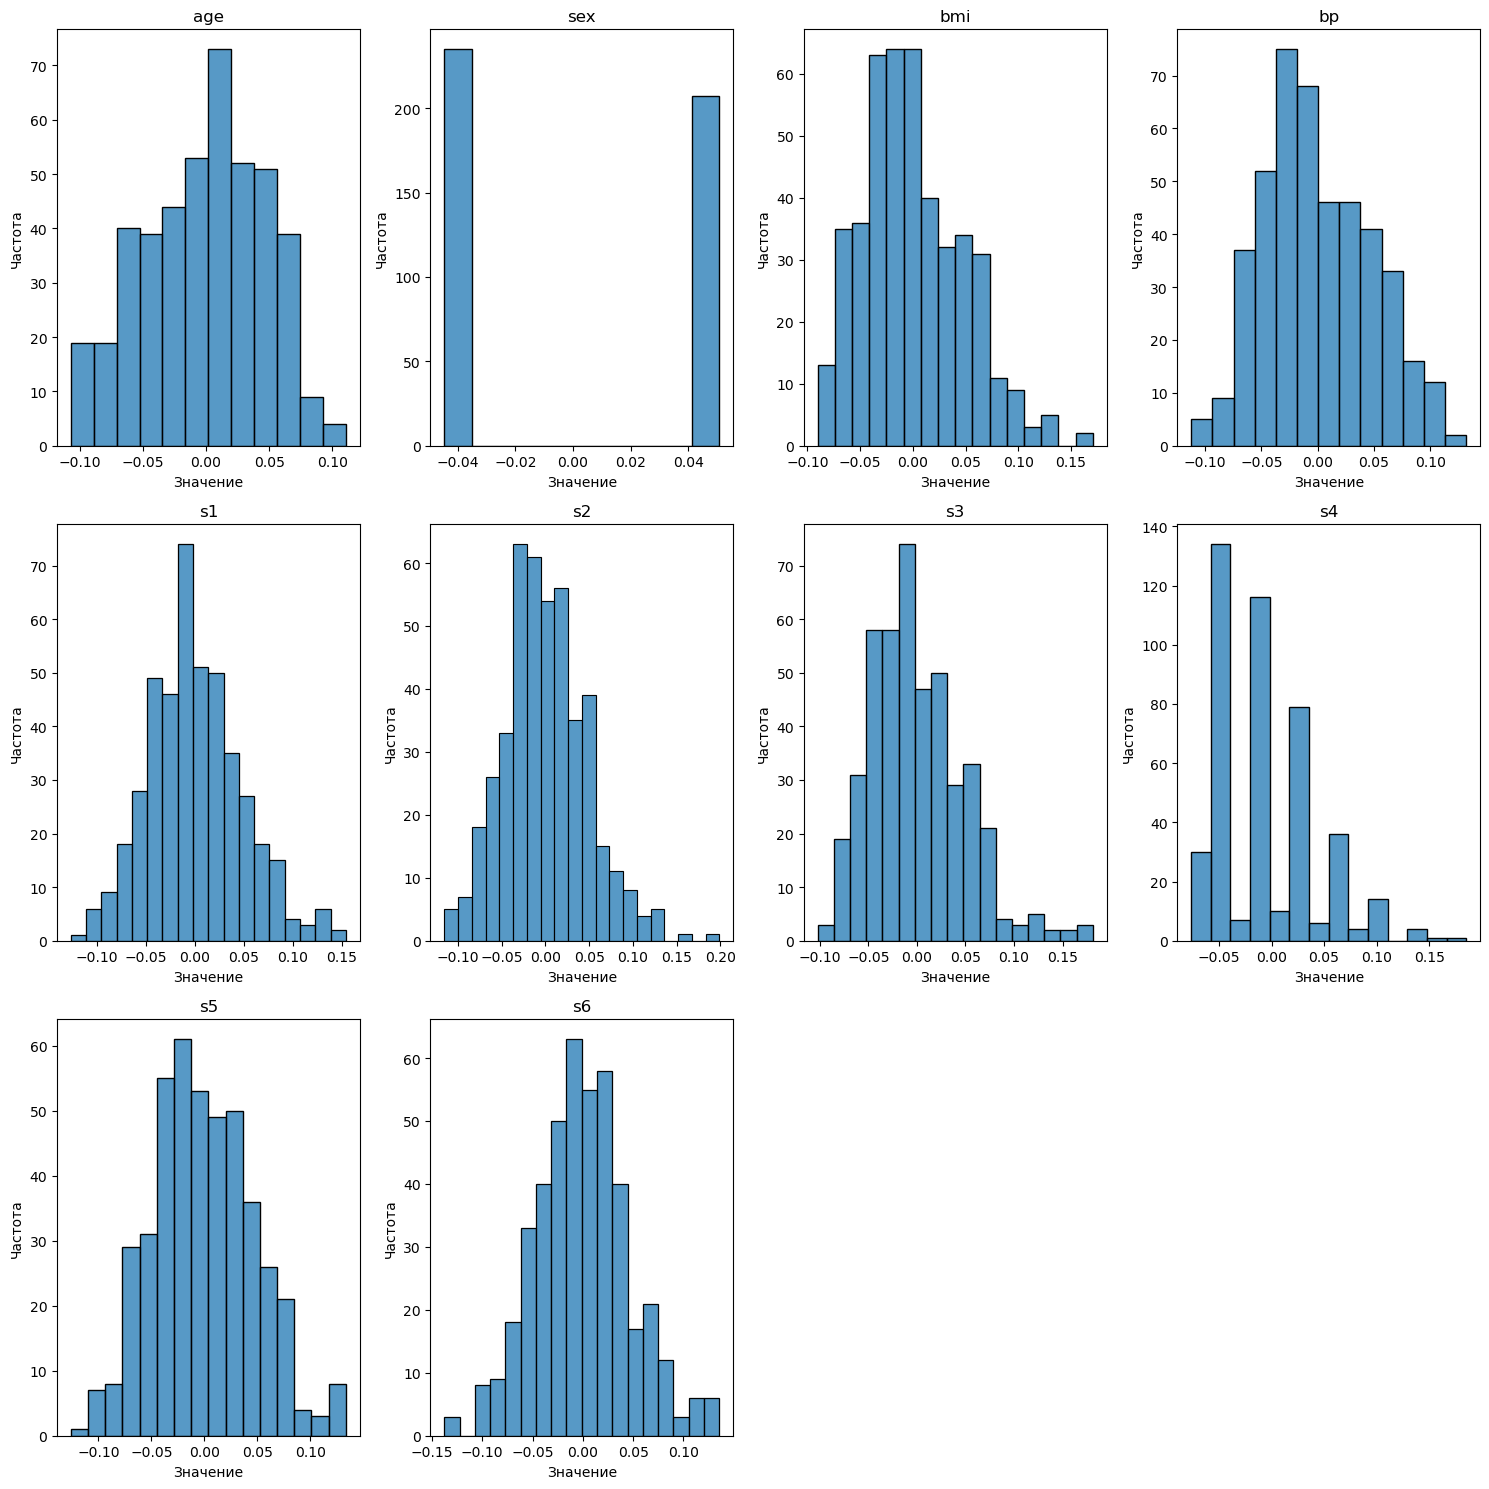

In [ ]:
diabetes_df = pd.DataFrame(diabetes_dataset['data'], columns=diabetes_dataset['feature_names'])

plt.figure(figsize=(15, 15))

for i, feature in enumerate(diabetes_dataset['feature_names']):
    plt.subplot(3, 4, i + 1)
    sns.histplot(diabetes_df[feature])
    plt.title(feature)
    plt.xlabel("Значение")
    plt.ylabel("Частота")

plt.tight_layout()
plt.show()

<p>Разбиение датасета на обучающий и тестовый наборы</p>

In [ ]:
X_training, X_testing, y_training, y_testing = train_test_split(diabetes_dataset['data'], diabetes_dataset['target'], random_state=13)

<p>Алгоритм регрессии k-ближайших соседей</p>

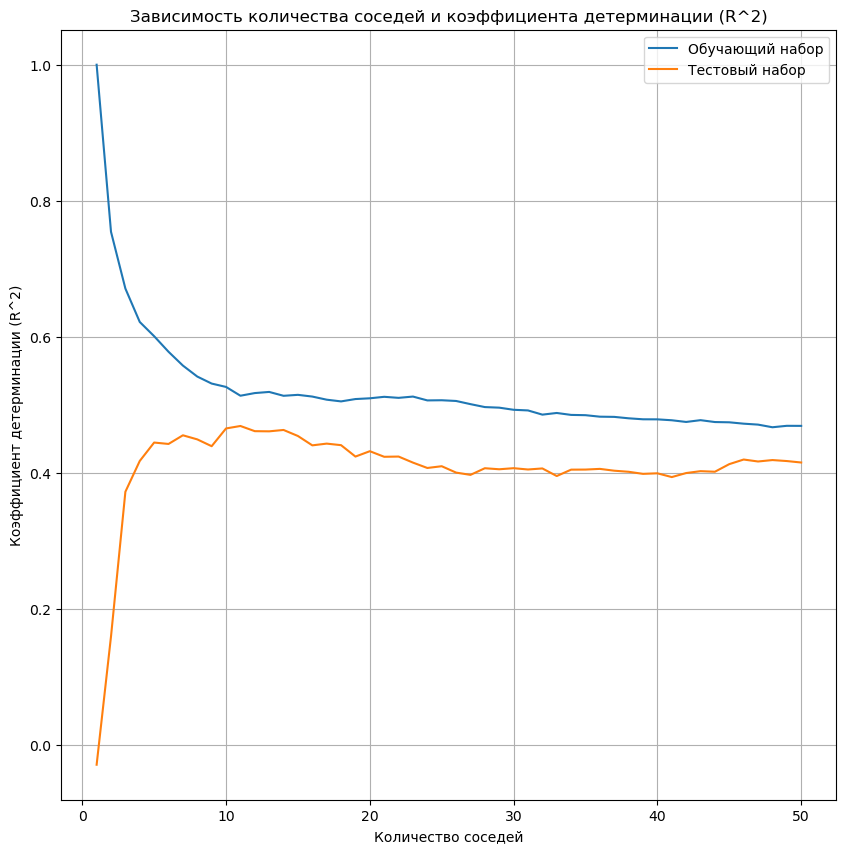

In [ ]:
n_neighbors_values = [i for i in range(1, 51)]
scores_training = []

for n_value in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=n_value)
    model.fit(X_training, y_training)
    scores_training.append(model.score(X_training, y_training))

n_neighbors_values = [i for i in range(1, 51)]
scores_testing = []

for n_value in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=n_value)
    model.fit(X_training, y_training)
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 10))

plt.plot(n_neighbors_values, scores_training, label='Обучающий набор')
plt.plot(n_neighbors_values, scores_testing, label='Тестовый набор')

plt.title('Зависимость количества соседей и коэффициента детерминации (R^2)')
plt.xlabel('Количество соседей')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()

<p>
    Из графика видно, что алгоритм регрессии k-ближайших соседей показал низкий результат. Лучший показатель составил всего 45% при около 10 соседях. Датасет, используемый для обучения, хорошо сбалансирован, не содержит пропущенных данных и имеет 442 записи, так что проблемы с данными и шумом маловероятны.

    Однако на графике видно, что модель переобучается при небольшом количестве соседей на обучающем наборе данных, что указывает на недостаточную способность модели к обобщению. Вероятно, сложные и нелинейные взаимосвязи между признаками и целевыми значениями делают алгоритм k-ближайших соседей неэффективным.
</p>

<p>Линейная регрессия</p>

In [ ]:
model = LinearRegression()
model.fit(X_training, y_training)

print('Веса (coef_):\n', model.coef_)
print('\nСдвиг (intercept_): ', model.intercept_)

print('\nКоэффициент детерминации (R^2) для обучающего набора: ', model.score(X_training, y_training))
print('\nКоэффициент детерминации (R^2) для тестового набора: ', model.score(X_testing, y_testing))

Веса (coef_):
 [  -1.54281407 -248.57400167  561.56528131  332.49226179 -463.08987606
  191.85970748  -83.43832882   76.51829797  660.47981271   93.94878061]

Сдвиг (intercept_):  150.18271592960264

Коэффициент детерминации (R^2) для обучающего набора:  0.5342619104885663

Коэффициент детерминации (R^2) для тестового набора:  0.44385561920019223


<p>
   Метод линейной регрессии демонстрирует аналогичную эффективность по сравнению с алгоритмом регрессии k-ближайших соседей. Однако и в том, и в другом случае результаты на обучающем и тестовом наборах данных остаются низкими. Это, вероятно, связано с сложными взаимосвязями между признаками, отсутствием явных закономерностей и нелинейными связями, как уже упоминалось ранее.
</p>

<p>Ridge регрессия</p>

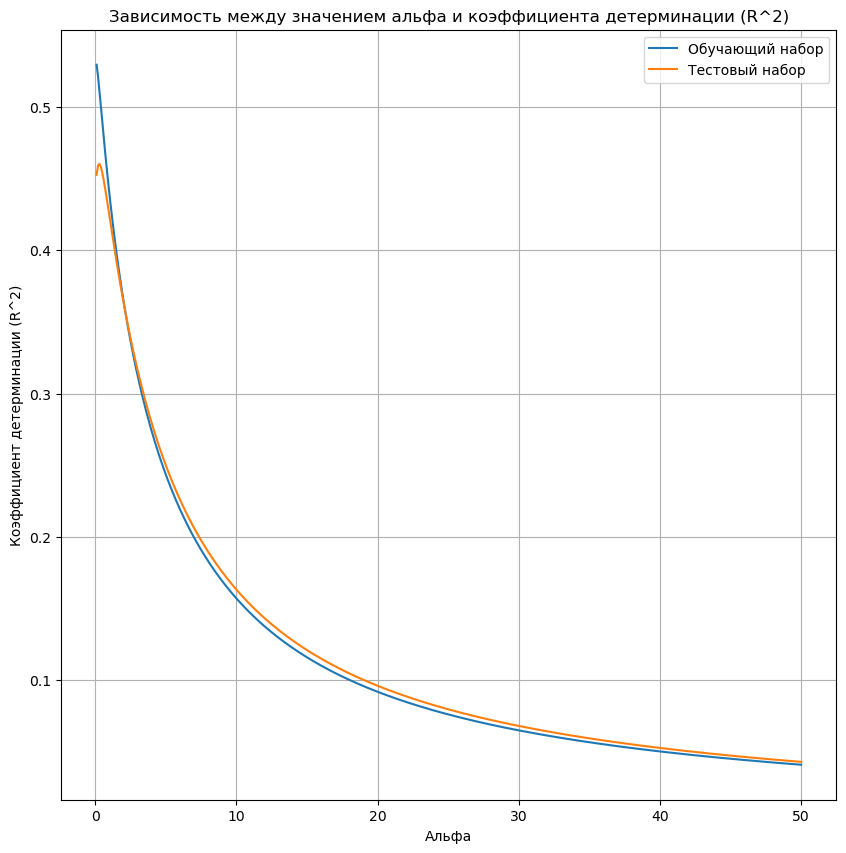

In [ ]:
alpha_values = np.arange(0.1, 50.1, 0.1)
scores_training = []

for alpha_value in alpha_values:
    model = Ridge(alpha=alpha_value)
    model.fit(X_training, y_training)
    
    scores_training.append(model.score(X_training, y_training))

alpha_values = np.arange(0.1, 50.1, 0.1)
scores_testing = []

for alpha_value in alpha_values:
    model = Ridge(alpha=alpha_value)
    model.fit(X_training, y_training)
    
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, scores_training, label='Обучающий набор')
plt.plot(alpha_values, scores_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и коэффициента детерминации (R^2)')
plt.xlabel('Альфа')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()

<p>Lasso регрессия</p>

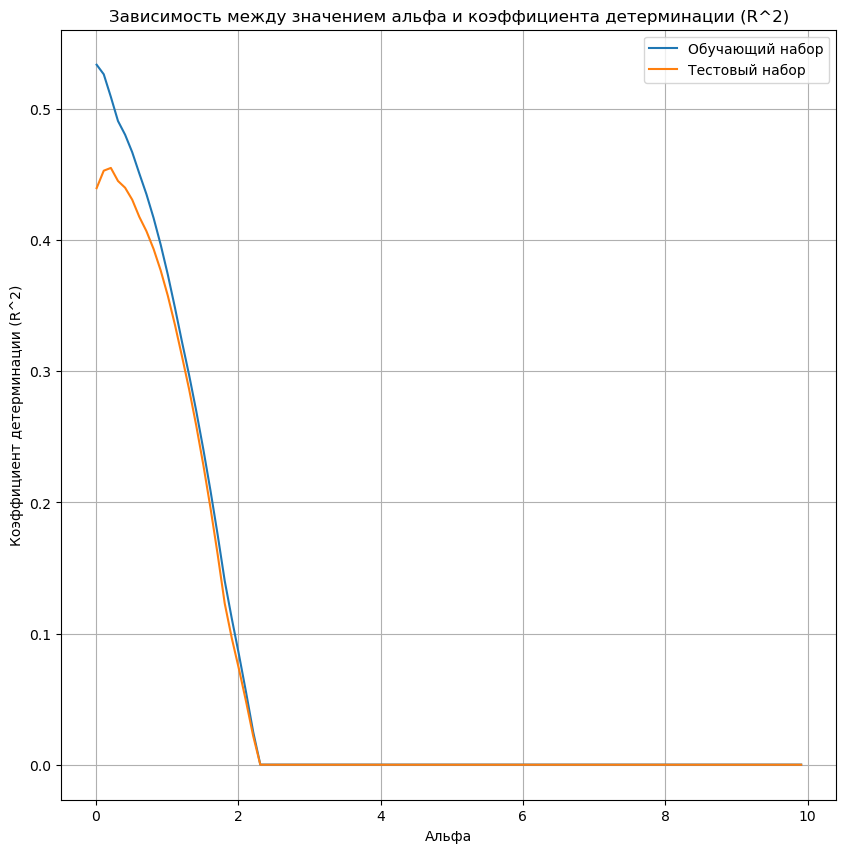

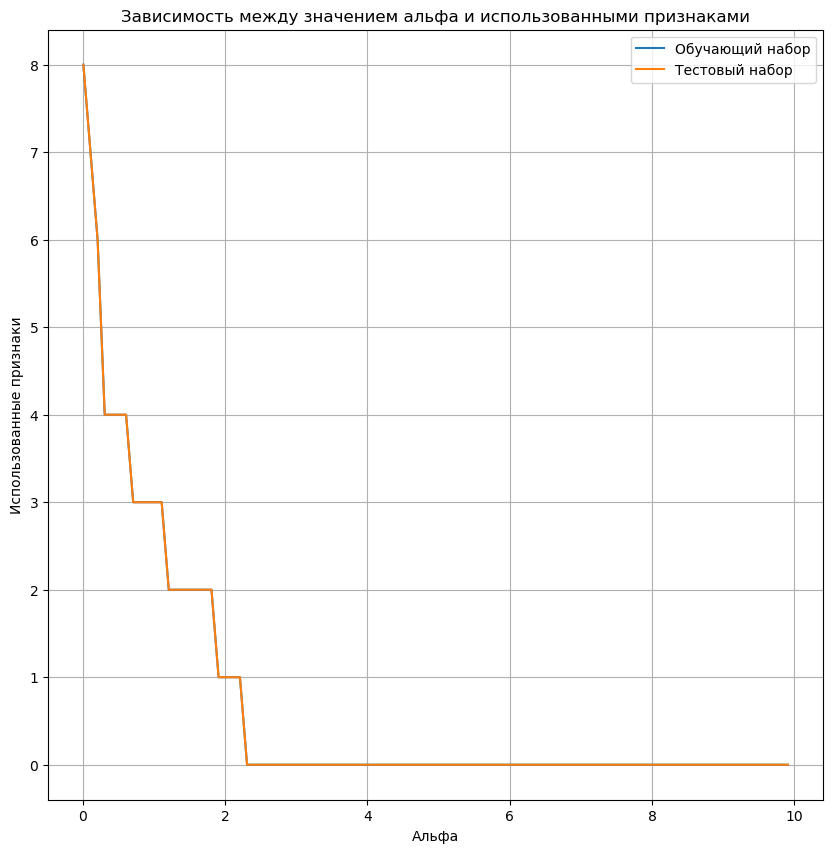

In [ ]:
alpha_values = np.arange(0.01, 10.01, 0.1)
used_features_training = []
scores_training = []

for alpha_value in alpha_values:
    model = Lasso(alpha=alpha_value, max_iter=10000)
    model.fit(X_training, y_training)
    
    used_features_training.append(np.sum(model.coef_ != 0))
    scores_training.append(model.score(X_training, y_training))

alpha_values = np.arange(0.01, 10.01, 0.1)
used_features_testing = []
scores_testing = []

for alpha_value in alpha_values:
    model = Lasso(alpha=alpha_value, max_iter=10000)
    model.fit(X_training, y_training)
    
    used_features_testing.append(np.sum(model.coef_ != 0))
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, scores_training, label='Обучающий набор')
plt.plot(alpha_values, scores_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и коэффициента детерминации (R^2)')
plt.xlabel('Альфа')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, used_features_training, label='Обучающий набор')
plt.plot(alpha_values, used_features_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и использованными признаками')
plt.xlabel('Альфа')
plt.ylabel('Использованные признаки')

plt.grid(True)
plt.legend(loc='best')

plt.show()

<p>2. Набор данных физических упражнений</p>

In [ ]:
linnerud_dataset = load_linnerud()

<p>Размерность датасета</p>

In [ ]:
print(linnerud_dataset['data'].shape)

(20, 3)


<p>Краткое описание</p>

In [ ]:
print(linnerud_dataset['DESCR'])

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



<p>Список признаков</p>

In [ ]:
print(linnerud_dataset['feature_names'])

['Chins', 'Situps', 'Jumps']


<p>Данные о упражнениях</p>

In [ ]:
print(linnerud_dataset['data'])

[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]
 [  4. 101.  42.]
 [  8. 101.  38.]
 [  6. 125.  40.]
 [ 15. 200.  40.]
 [ 17. 251. 250.]
 [ 17. 120.  38.]
 [ 13. 210. 115.]
 [ 14. 215. 105.]
 [  1.  50.  50.]
 [  6.  70.  31.]
 [ 12. 210. 120.]
 [  4.  60.  25.]
 [ 11. 230.  80.]
 [ 15. 225.  73.]
 [  2. 110.  43.]]


<p>Физиологические данные</p>

In [ ]:
print(linnerud_dataset['target'])

[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]]


<p>Распределение признаков датасета (упражнения)</p>

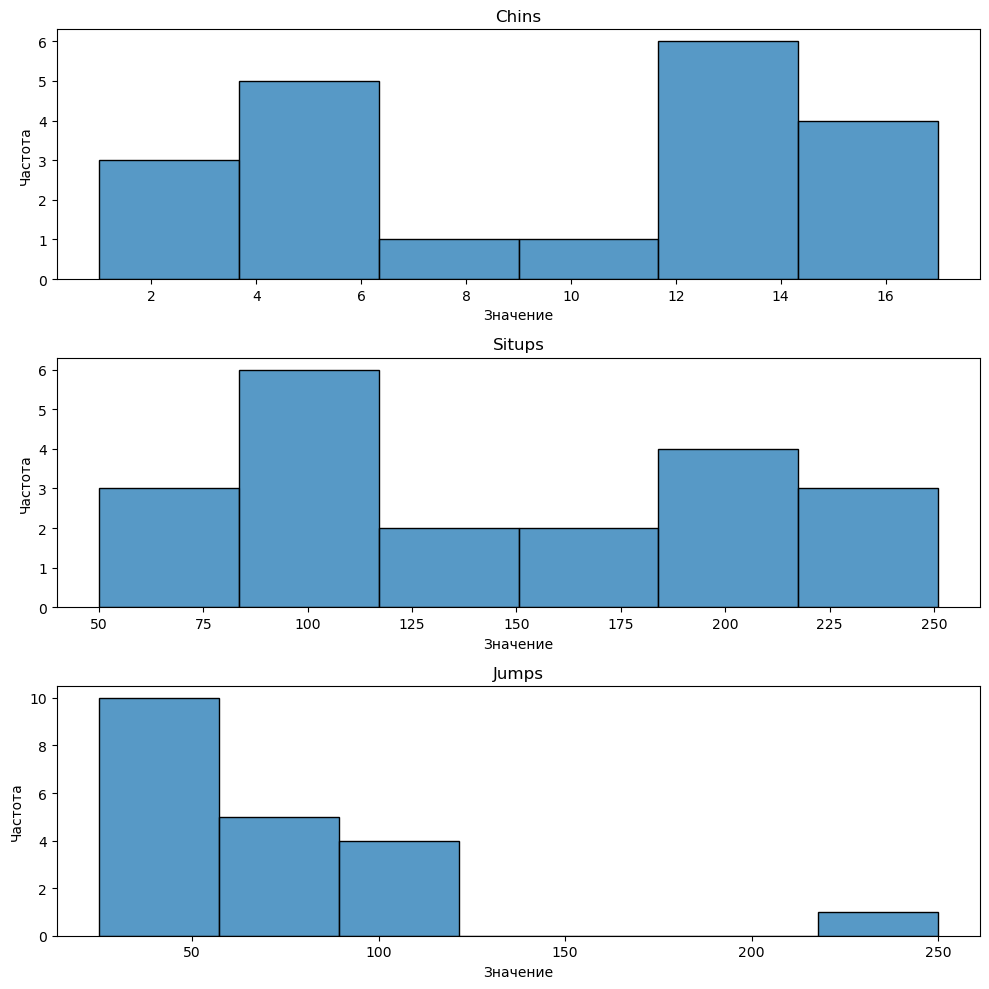

In [ ]:
linnerud_df = pd.DataFrame(linnerud_dataset['data'], columns=linnerud_dataset['feature_names'])

plt.figure(figsize=(10, 10))

for i, feature in enumerate(linnerud_dataset['feature_names']):
    plt.subplot(3, 1, i + 1)    
    sns.histplot(linnerud_df[feature])
    plt.title(feature)
    plt.xlabel("Значение")
    plt.ylabel("Частота")

plt.tight_layout()
plt.show()

<p>Распределение признаков датасета (физиологические данные)</p>

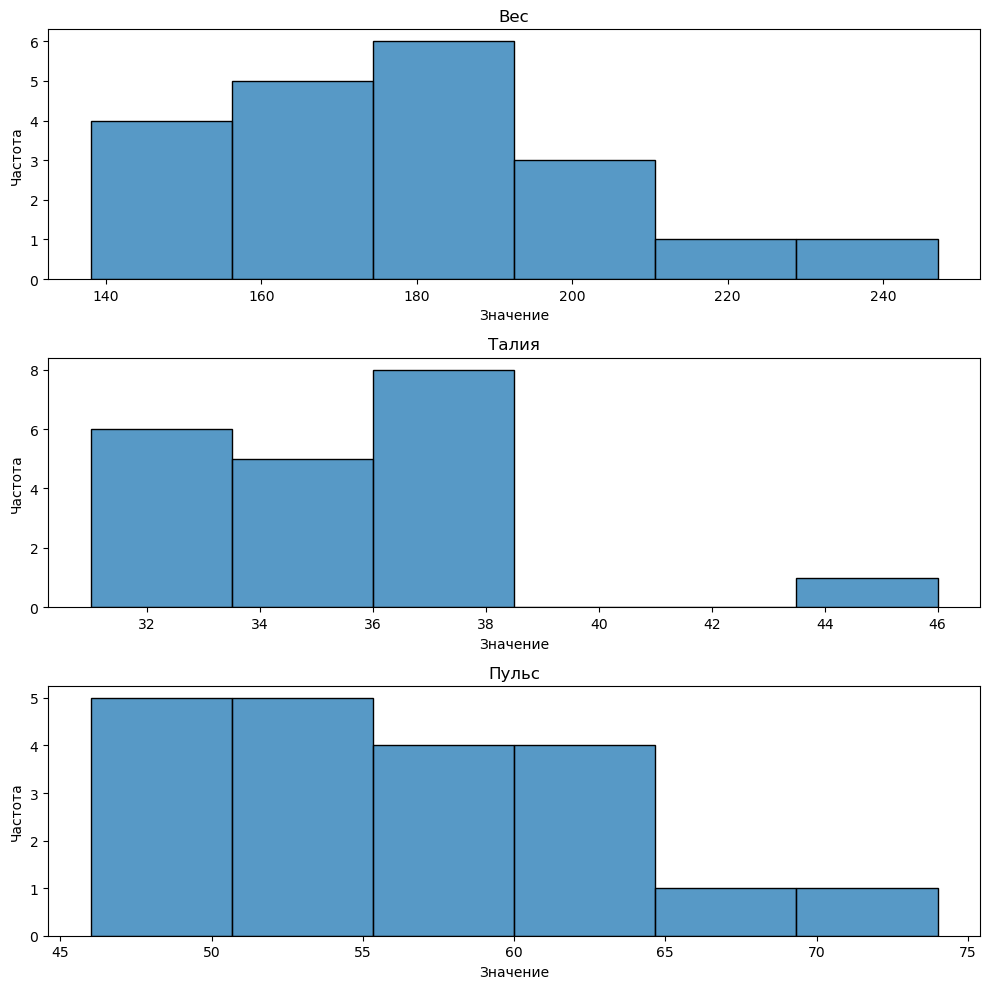

In [ ]:
linnerud_df = pd.DataFrame(linnerud_dataset['target'], columns=['Вес', 'Талия', 'Пульс'])

plt.figure(figsize=(10, 10))

for i, feature in zip([0, 1, 2], ['Вес', 'Талия', 'Пульс']):
    plt.subplot(3, 1, i + 1)    
    sns.histplot(linnerud_df[feature])
    plt.title(feature)
    plt.xlabel("Значение")
    plt.ylabel("Частота")

plt.tight_layout()
plt.show()

<hp4>Разбиение датасета на обучающий и тестовый наборы</p>

In [ ]:
X_training, X_testing, y_training, y_testing = train_test_split(linnerud_dataset['data'], linnerud_dataset['target'], random_state=13)

<p>Алгоритм регрессии k-ближайших соседей </p>

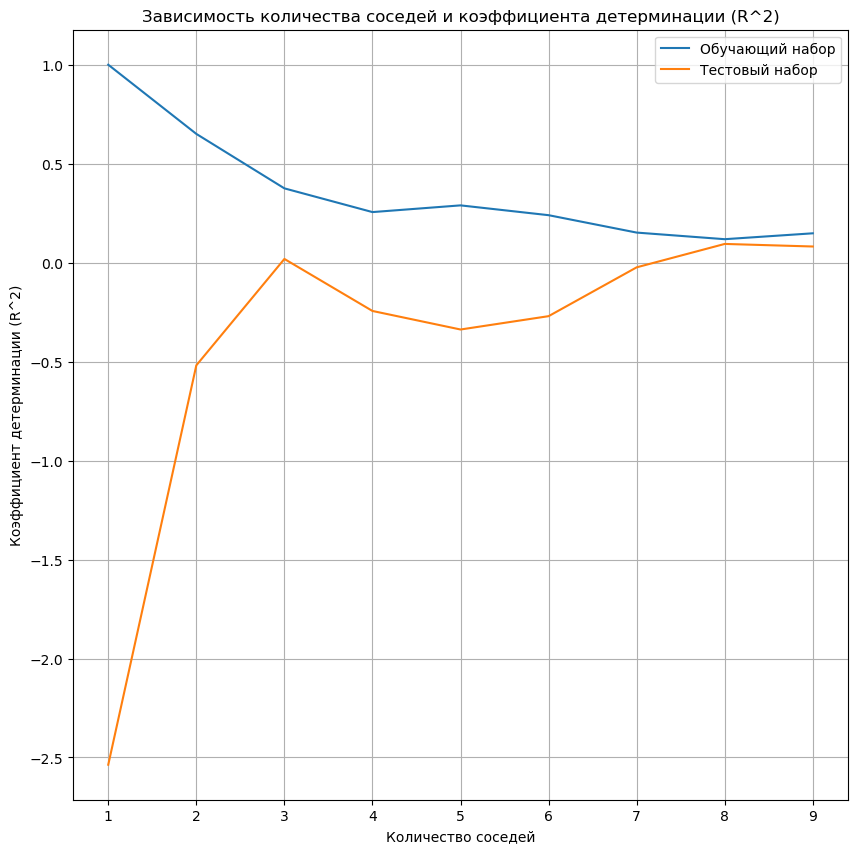

In [ ]:
n_neighbors_values = [i for i in range(1, 10)]
scores_training = []

for n_value in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=n_value)
    model.fit(X_training, y_training)
    scores_training.append(model.score(X_training, y_training))

n_neighbors_values = [i for i in range(1, 10)]
scores_testing = []

for n_value in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=n_value)
    model.fit(X_training, y_training)
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 10))

plt.plot(n_neighbors_values, scores_training, label='Обучающий набор')
plt.plot(n_neighbors_values, scores_testing, label='Тестовый набор')

plt.title('Зависимость количества соседей и коэффициента детерминации (R^2)')
plt.xlabel('Количество соседей')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()

<p>Линейная регрессия</p>

In [ ]:
model = LinearRegression()
model.fit(X_training, y_training)

print('Веса (coef_):\n', model.coef_)
print('\nСдвиг (intercept_): ', model.intercept_)

print('\nКоэффициент детерминации (R^2) для обучающего набора: ', model.score(X_training, y_training))
print('\nКоэффициент детерминации (R^2) для тестового набора: ', model.score(X_testing, y_testing))

Веса (coef_):
 [[-0.24161305 -0.27111294  0.1457931 ]
 [-0.12269967 -0.04179285  0.02786487]
 [-0.49741217  0.02618111  0.01633691]]

Сдвиг (intercept_):  [208.41757069  40.6506262   55.34315168]

Коэффициент детерминации (R^2) для обучающего набора:  0.2808980183833038

Коэффициент детерминации (R^2) для тестового набора:  0.20735072562944326


<p>
    Линейная регрессия показывает схожий результат, приблизительно 20%. Однако для успешного обучения модели линейной регрессии требуется наличие не менее 400 экземпляров данных. Если это условие не выполняется, это может привести к недостаточному обучению модели (недообучению).
</p>

<p>Ridge регрессия</p>

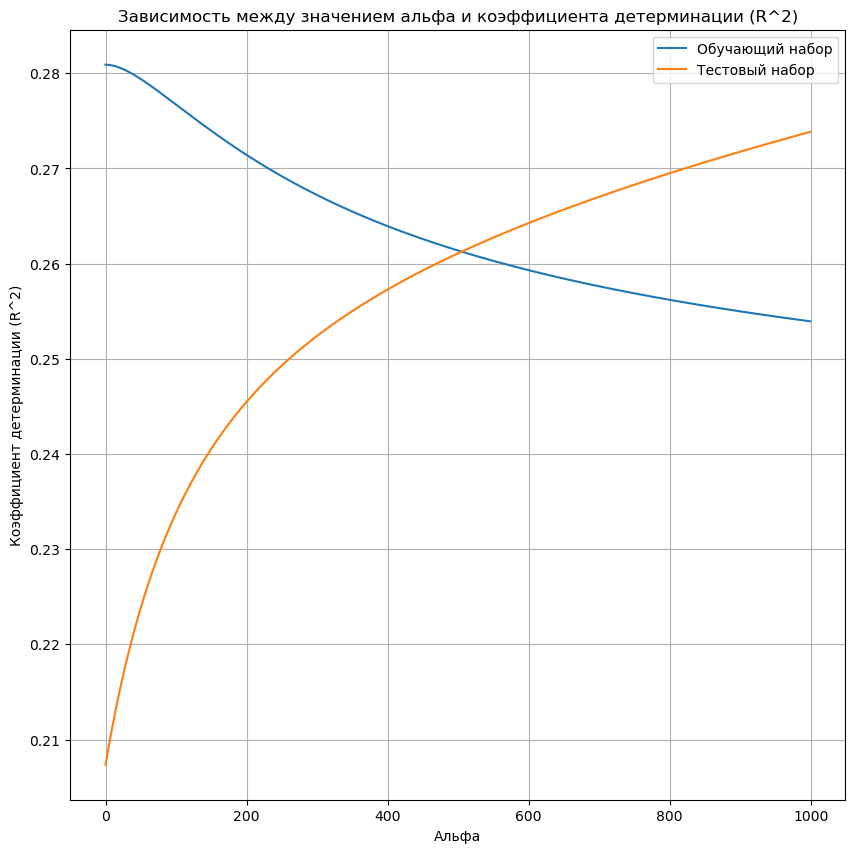

In [ ]:
alpha_values = np.arange(0, 1000)
scores_training = []

for alpha_value in alpha_values:
    model = Ridge(alpha=alpha_value)
    model.fit(X_training, y_training)
    
    scores_training.append(model.score(X_training, y_training))

alpha_values = np.arange(0, 1000)
scores_testing = []

for alpha_value in alpha_values:
    model = Ridge(alpha=alpha_value)
    model.fit(X_training, y_training)
    
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, scores_training, label='Обучающий набор')
plt.plot(alpha_values, scores_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и коэффициента детерминации (R^2)')
plt.xlabel('Альфа')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()

<p>
    При использовании Ridge регрессии с параметром alpha, равным 500, достигнута результативность на уровне 26%. Эта модель показывает лучшие результаты по сравнению с предыдущими моделями, хотя всё равно имеется место для улучшения конечной результативности.
</p>

<p>Lasso регрессия</p>

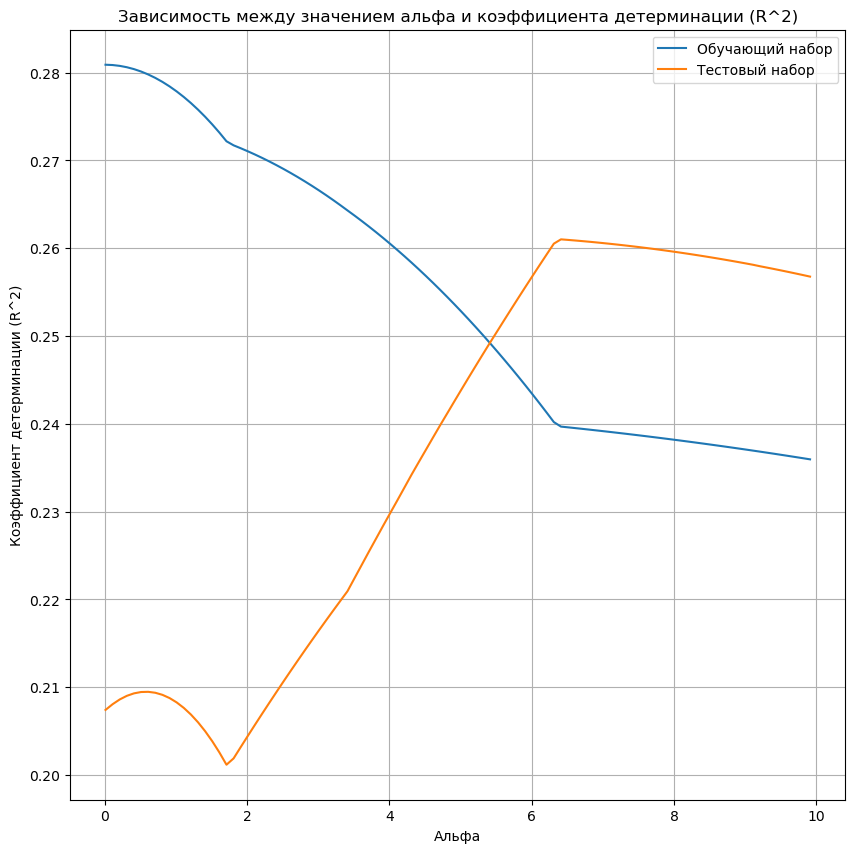

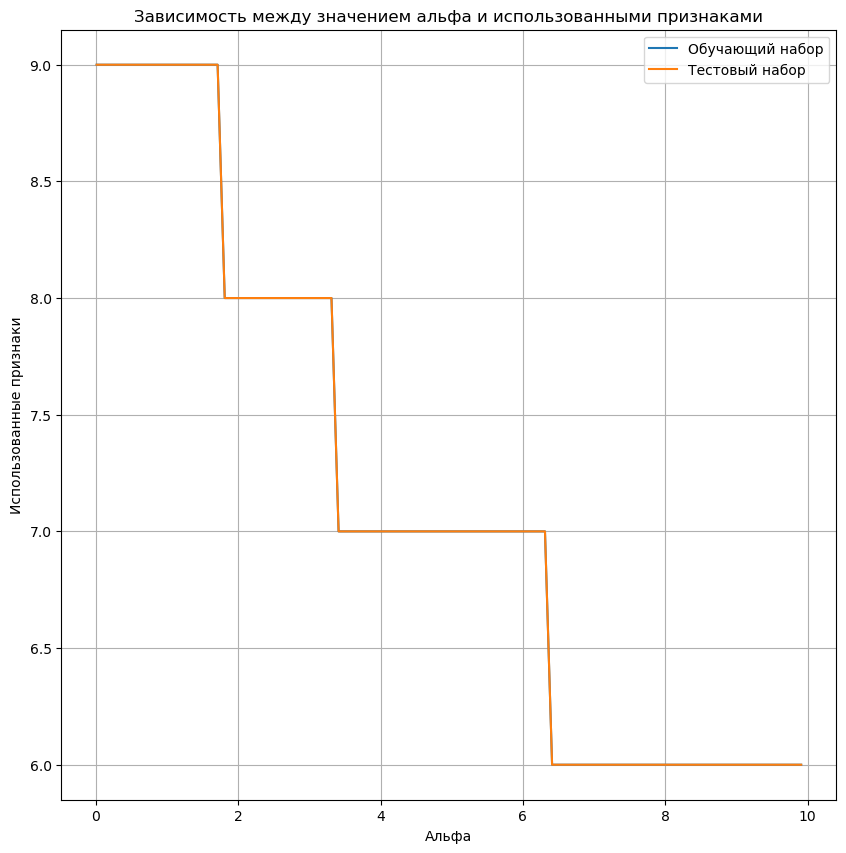

In [ ]:
alpha_values = np.arange(0.01, 10.01, 0.1)
used_features_training = []
scores_training = []

for alpha_value in alpha_values:
    model = Lasso(alpha=alpha_value, max_iter=10000)
    model.fit(X_training, y_training)
    
    used_features_training.append(np.sum(model.coef_ != 0))
    scores_training.append(model.score(X_training, y_training))

alpha_values = np.arange(0.01, 10.01, 0.1)
used_features_testing = []
scores_testing = []

for alpha_value in alpha_values:
    model = Lasso(alpha=alpha_value, max_iter=10000)
    model.fit(X_training, y_training)
    
    used_features_testing.append(np.sum(model.coef_ != 0))
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, scores_training, label='Обучающий набор')
plt.plot(alpha_values, scores_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и коэффициента детерминации (R^2)')
plt.xlabel('Альфа')
plt.ylabel('Коэффициент детерминации (R^2)')

plt.grid(True)
plt.legend(loc='best')

plt.show()

plt.figure(figsize=(10, 10))

plt.plot(alpha_values, used_features_training, label='Обучающий набор')
plt.plot(alpha_values, used_features_testing, label='Тестовый набор')

plt.title('Зависимость между значением альфа и использованными признаками')
plt.xlabel('Альфа')
plt.ylabel('Использованные признаки')

plt.grid(True)
plt.legend(loc='best')

plt.show()

<p>
    Результативность Lasso регрессиии составляет 25% при значении alpha равном 5.
</p>